In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import seaborn as sns

pd.options.display.max_columns = None
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 150

In [2]:
X_train, X_ivs, y_train, col_names = pickle.load(open("../data/drd2_data.pickle", "rb"))
X_train = pd.DataFrame(X_train, columns=col_names)

In [3]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

alphas = np.logspace(-4, 4, 20)
coefs_list = []

D_cols = [col for col in X_train.columns if "D" in col]

ct = ColumnTransformer([("scale", StandardScaler(), D_cols)], remainder="passthrough")
pipe = Pipeline([("ct", ct), ("lasso", Lasso(max_iter=10000))])


for alpha in alphas:
    pipe.steps[1][1].set_params(alpha=alpha)
    pipe.fit(X_train, y_train)
    coefs = pipe.steps[1][1].coef_
    coefs_list.append(coefs)

In [9]:
coef_df = pd.DataFrame(coefs_list)
coef_df.columns = col_names
coef_df["alpha"] = alphas

coef_df

D00       D01  D02  D03      D04       D05       D06  D07  D08  \
0  -0.055552 -0.003367 -0.0 -0.0 -0.00589  0.068541  0.066727 -0.0 -0.0   
1  -0.000000 -0.000000 -0.0  0.0 -0.00000  0.027798  0.015801 -0.0 -0.0   
2  -0.000000 -0.000000 -0.0  0.0 -0.00000  0.020690  0.000000 -0.0 -0.0   
3  -0.000000 -0.000000 -0.0  0.0 -0.00000  0.015251 -0.000000 -0.0 -0.0   
4   0.000000  0.000000 -0.0  0.0  0.00000  0.003899 -0.000000 -0.0 -0.0   
5   0.000000  0.000000  0.0  0.0  0.00000  0.000000 -0.000000  0.0  0.0   
6   0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
7   0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
8   0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
9   0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
10  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
11  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
12  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
13  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
14  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
15  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
16  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
17  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
18  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   
19  0.000000  0.000000  0.0  0.0  0.00000  0.000000  0.000000  0.0  0.0   

         D09       D10       D11       D12  D13       D14       D15       D16  \
0  -0.005125  0.035102  0.000000  0.030146  0.0  0.000000 -0.000588 -0.001281   
1  -0.000000  0.010118  0.003110  0.014742  0.0  0.000000 -0.000000 -0.000000   
2  -0.000000  0.000000  0.007903  0.002513  0.0  0.004510 -0.000000  0.000000   
3  -0.000000 -0.000000  0.006111  0.000000  0.0  0.009055  0.000000  0.003368   
4  -0.000000 -0.000000  0.010008  0.000000 -0.0  0.006336  0.000000  0.000000   
5   0.000000 -0.000000  0.005306  0.000000 -0.0  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
13  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

    D17       D18       D19       D20       D21       D22       D23  D24  \
0  -0.0  0.029647 -0.010977 -0.012106 -0.011122  0.001380 -0.016104 -0.0   
1  -0.0  0.021568 -0.000217 -0.013224 -0.009607 -0.002668 -0.016978 -0.0   
2   0.0  0.016611  0.003666 -0.010603 -0.004891 -0.004067 -0.018382 -0.0   
3   0.0  0.011632  0.004574 -0.011644 -0.000000 -0.004315 -0.019346 -0.0   
4  -0.0  0.006141  0.000987 -0.010583  0.000000 -0.000000 -0.013516 -0.0   
5  -0.0  0.004816  0.003323 -0.008114  0.000000 -0.000000 -0.005610  0.0   
6  -0.0  0.006311  0.000000 -0.000000  0.000000 -0.000000 -0.000000  0.0   
7  -0.0  0.000000  0.000000 -0.000000  0.000000  0.000000 -0.000000  0.0   
8  -0.0  0.000000  0.000000 -0.000000  0.000000

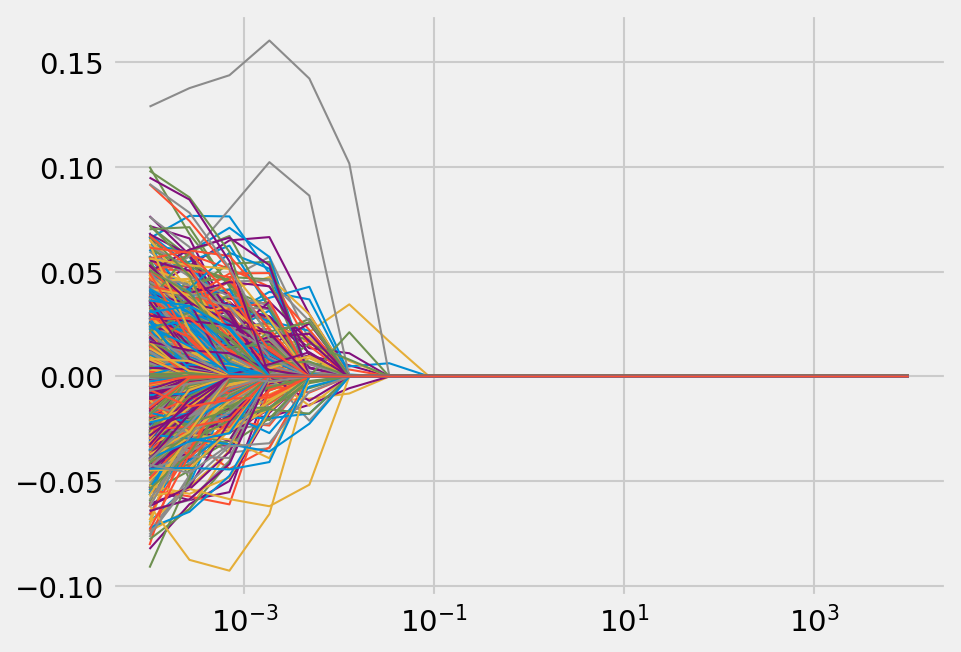

In [5]:
for col in coef_df.columns[:-1]:
    plt.plot(alphas, coef_df[col], linewidth=1)

plt.xscale("log")
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# optimizing Lasso

gs = GridSearchCV(
    pipe,
    {"lasso__alpha": np.logspace(-4, 4, 10)},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
    return_train_score=True,
)

gs_scores = gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.182) total time=  19.9s
[CV 2/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.184) total time=  25.0s
[CV 3/5] END lasso__alpha=0.0001;, score=(train=-0.137, test=-0.181) total time=  24.9s
[CV 4/5] END lasso__alpha=0.0001;, score=(train=-0.136, test=-0.180) total time=  20.8s
[CV 5/5] END lasso__alpha=0.0001;, score=(train=-0.135, test=-0.187) total time=  24.0s
[CV 1/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.181, test=-0.185) total time=   2.8s
[CV 2/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.196) total time=   2.8s
[CV 3/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.194) total time=   2.9s
[CV 4/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.179, test=-0.192) total time=   2.6s
[CV 5/5] END lasso__alpha=0.000774263682681127;, score=(train=-0.177, test=-0.196) total ti

<Figure size 1500x750 with 0 Axes>

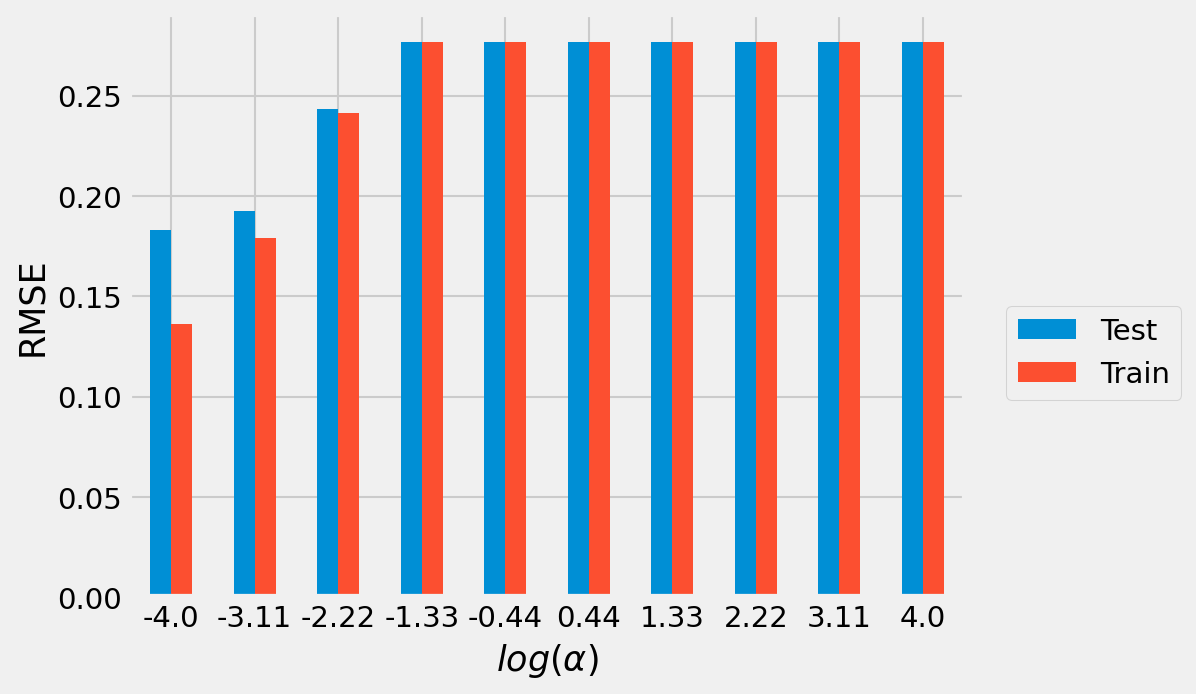

In [10]:
gs_scores_df = pd.DataFrame(gs_scores.cv_results_)
fig = plt.figure(figsize=(10, 5))
gs_scores_df[
    ["param_lasso__alpha", "mean_test_score", "mean_train_score"]
].abs().plot.bar(x="param_lasso__alpha")
plt.xlabel(r"$log(\alpha)$")
plt.xticks(
    ticks=np.arange(0, 10),
    labels=[i for i in np.linspace(-4, 4, 10).round(2)],
    rotation=0,
)
plt.ylabel("RMSE")

# get the legend to the side
plt.legend(
    bbox_to_anchor=(1.05, 0.5),
    loc="upper left",
    borderaxespad=0,
    labels=["Test", "Train"],
)

In [13]:
gs_scores_df[["param_lasso__alpha", "mean_test_score", "mean_train_score"]].abs()

,param_lasso__alpha,mean_test_score,mean_train_score
0,0.0001,0.182974,0.136014
1,0.000774,0.192563,0.179121
2,0.005995,0.243233,0.241420
3,0.046416,0.276682,0.276628
4,0.359381,0.276682,0.276628
5,2.782559,0.276682,0.276628
6,21.544347,0.276682,0.276628
7,166.810054,0.276682,0.276628
8,1291.549665,0.276682,0.276628
9,10000.0,0.276682,0.276628


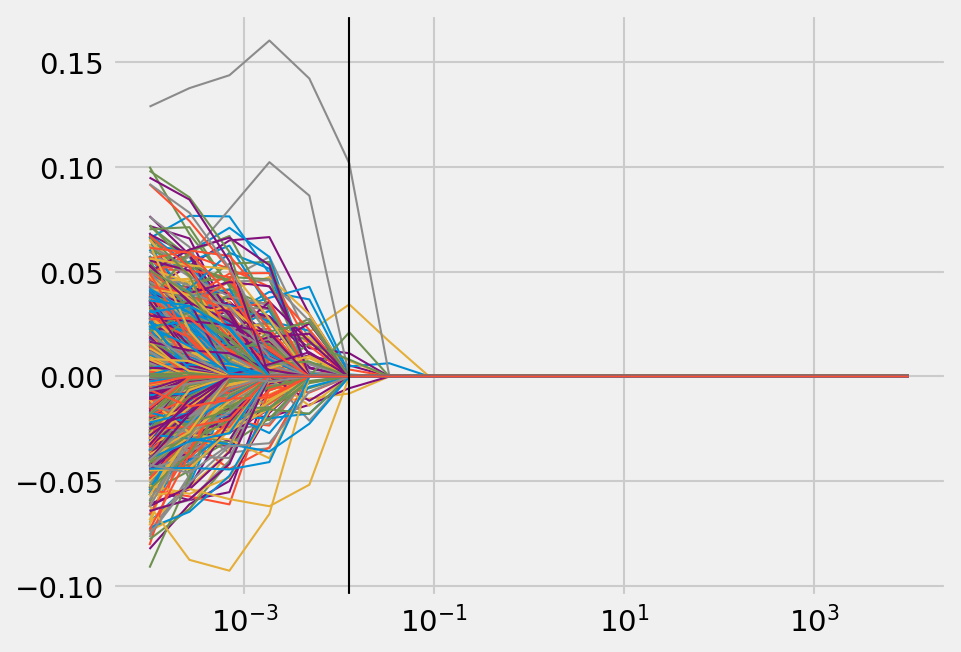

In [20]:
for col in coef_df.columns[:-1]:
    plt.plot(alphas, coef_df[col], linewidth=1)

plt.xscale("log")
plt.axvline(0.012743, color="black", linestyle="-", linewidth=1)
plt.show()

In [11]:
coef_df["alpha"]

0         0.000100
1         0.000264
2         0.000695
3         0.001833
4         0.004833
5         0.012743
6         0.033598
7         0.088587
8         0.233572
9         0.615848
10        1.623777
11        4.281332
12       11.288379
13       29.763514
14       78.475997
15      206.913808
16      545.559478
17     1438.449888
18     3792.690191
19    10000.000000
Name: alpha, dtype: float64

In [22]:
coef_df.iloc[5, :].abs().drop("alpha").T.sort_values(ascending=False).head(41)

FP1011    0.101616
D32       0.034408
FP1484    0.021096
FP0310    0.011079
D20       0.008114
FP1532    0.008049
D26       0.007395
D23       0.005610
D11       0.005306
D18       0.004816
D19       0.003323
FP0503    0.000915
FP1380    0.000000
FP1378    0.000000
FP1379    0.000000
FP1389    0.000000
FP1381    0.000000
FP1388    0.000000
FP1386    0.000000
FP1387    0.000000
FP1382    0.000000
FP1383    0.000000
FP1384    0.000000
FP1385    0.000000
FP1377    0.000000
D00       0.000000
FP1376    0.000000
FP1368    0.000000
FP1362    0.000000
FP1363    0.000000
FP1364    0.000000
FP1365    0.000000
FP1366    0.000000
FP1367    0.000000
FP1369    0.000000
FP1375    0.000000
FP1370    0.000000
FP1371    0.000000
FP1372    0.000000
FP1373    0.000000
FP1391    0.000000
Name: 5, dtype: float64

In [ ]:
coefficients = gs.best_estimator_.named_steps["lasso"].coef_
importance = np.abs(coefficients)
feats = np.array(col_names)
len(feats[importance > 0.1])

3